# Naive bayes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/CL_underover_Normalized-dataset.csv",sep='\t',decimal=",",index_col=0)

In [3]:
df.head()

,Imax,E,PIL,Mt,TsW,NbxW,MeanD,Eday_of_week,class
0,0.019796,0.520590,0.167672,0.000820,0.004367,0.019704,0.187397,0.738108,0
1,0.001459,0.289906,0.167672,0.000713,0.000436,0.000000,0.000000,0.000000,0
2,0.005001,0.383625,0.167672,0.000607,0.000811,0.000000,0.000000,0.000000,0
3,0.005001,0.611036,0.167672,0.000757,0.007482,0.044335,0.192329,0.689678,0
4,0.003959,0.413622,0.167672,0.000902,0.001998,0.014778,0.258904,0.758789,0


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
label = df.pop('class')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.20)

## Modello

In [20]:
dataset = ["under","over","underover","under_Normalized","over_Normalized","underover_Normalized"]
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
for name in dataset:
    print("Dataset: dataset/CL_"+name+"-dataset.csv")
    dataset = df = pd.read_csv("dataset/CL_"+name+"-dataset.csv",sep='\t',decimal=",",index_col=0)
    gnb = GaussianNB()
    multinomialnb = MultinomialNB()
    complementnb = ComplementNB()
    bernoullinb = BernoulliNB()
    categoricalnb = CategoricalNB()
    gnb.fit(train_set, train_label)
    print(classification_report(test_label, gnb.predict(test_set)))
    print("Number of mislabeled points out of a total %d points : %d"% (train_set.shape[0], (test_label != gnb.predict(test_set)).sum()))
    multinomialnb.fit(train_set, train_label)
    print(classification_report(test_label, multinomialnb.predict(test_set)))
    print("Number of mislabeled points out of a total %d points : %d"% (train_set.shape[0], (test_label != multinomialnb.predict(test_set)).sum()))
    complementnb.fit(train_set, train_label)
    print(classification_report(test_label, complementnb.predict(test_set)))
    print("Number of mislabeled points out of a total %d points : %d"% (train_set.shape[0], (test_label != complementnb.predict(test_set)).sum()))
    categoricalnb.fit(train_set, train_label)
    print(classification_report(test_label, categoricalnb.predict(test_set)))
    print("Number of mislabeled points out of a total %d points : %d"% (train_set.shape[0], (test_label != categoricalnb.predict(test_set)).sum()))
    bernoullinb.fit(train_set, train_label)
    print(classification_report(test_label, bernoullinb.predict(test_set)))
    print("Number of mislabeled points out of a total %d points : %d"% (train_set.shape[0], (test_label != bernoullinb.predict(test_set)).sum()))

Dataset: dataset/CL_under-dataset.csv
              precision    recall  f1-score   support

           0       0.47      0.88      0.61       338
           1       0.39      0.34      0.37       338
           2       0.77      0.18      0.29       338

    accuracy                           0.47      1014
   macro avg       0.54      0.47      0.42      1014
weighted avg       0.54      0.47      0.42      1014

Number of mislabeled points out of a total 4053 points : 539
              precision    recall  f1-score   support

           0       0.44      0.68      0.54       338
           1       0.40      0.41      0.40       338
           2       0.72      0.33      0.46       338

    accuracy                           0.47      1014
   macro avg       0.52      0.47      0.47      1014
weighted avg       0.52      0.47      0.47      1014

Number of mislabeled points out of a total 4053 points : 535
              precision    recall  f1-score   support

           0       0.45

## Visualizzazioni
Per discutere meglio sul metodo si visualizza uno scatterplot con 2 attributi e si vede se ci sono pattern evidenti

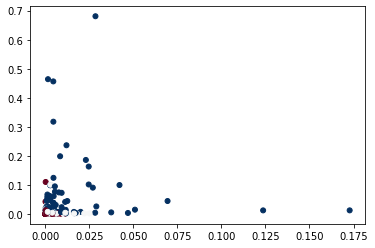

In [6]:
from sklearn.datasets import make_blobs
plt.scatter(test_set.iloc[:, 3].values, test_set.iloc[:, 4].values, c=test_label.values, s=25, cmap='RdBu');

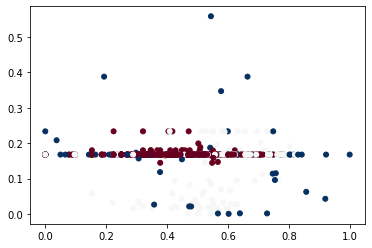

In [7]:
plt.scatter(test_set.iloc[:, 1].values, test_set.iloc[:, 2].values, c=test_pred_gnb, s=25, cmap='RdBu');